In [2]:
import pandas as pd
from sklearn.metrics import classification_report
Url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
train_df = pd.read_csv(Url)

In [84]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
E mbarked      889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
E mbarked       object
dtype: object

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
'Name','Sex','Ticket','Cabin','E mbarked'

('Name', 'Sex', 'Ticket', 'Cabin', 'E mbarked')

In [11]:
titanic[['Name','Sex','Ticket','Cabin','E mbarked']].head()

NameError: name 'titanic' is not defined

In [ ]:
train_df.isnull().sum()

In [12]:
train_df.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
E mbarked      891
dtype: int64

In [13]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
E mbarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

1. Age and Sex:

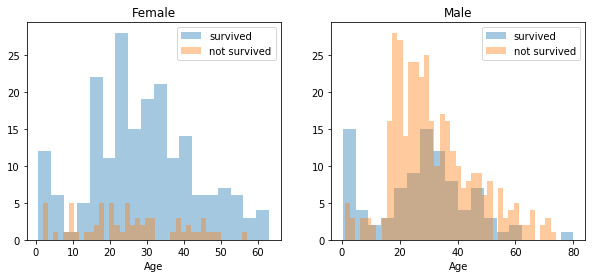

In [14]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

For men the probability of survival is very low but nfants also have a little bit higher probability of survival.

Pclass:

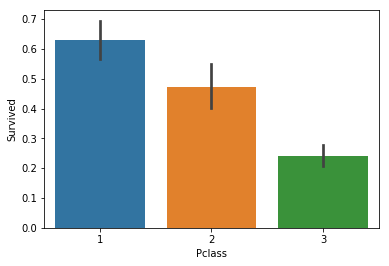

In [15]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1

SibSp and Parch:

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. 

In [16]:
data = [train_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [17]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


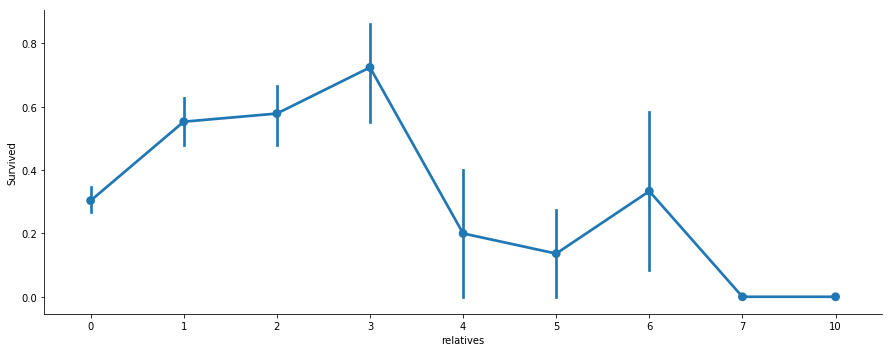

In [18]:
axes = sns.factorplot('relatives','Survived', data=train_df, aspect = 2.5, )

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [19]:
# drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability

In [20]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [21]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


Age:

In [22]:
is_null = train_df["Age"].isnull().sum()

In [23]:
mean = train_df["Age"].mean()
std = train_df["Age"].std()

In [24]:
std

14.526497332334044

In [25]:
mean

29.69911764705882

In [26]:
import numpy as np

In [27]:
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

In [28]:
rand_age

array([36, 31, 29, 25, 15, 33, 36, 23, 27, 16, 36, 40, 25, 41, 17, 30, 19,
       40, 18, 43, 16, 28, 21, 28, 26, 41, 23, 40, 19, 28, 37, 16, 32, 23,
       25, 20, 29, 24, 18, 32, 22, 40, 36, 32, 17, 19, 40, 18, 26, 21, 24,
       40, 42, 30, 26, 16, 17, 38, 23, 15, 27, 23, 29, 16, 27, 23, 17, 39,
       38, 22, 42, 16, 42, 25, 41, 37, 31, 39, 19, 17, 38, 37, 17, 38, 42,
       34, 22, 29, 41, 31, 26, 21, 25, 29, 21, 41, 24, 16, 16, 24, 16, 37,
       24, 26, 36, 30, 39, 39, 28, 26, 23, 41, 43, 34, 21, 15, 37, 32, 24,
       16, 17, 18, 26, 22, 19, 28, 41, 24, 37, 37, 16, 36, 41, 35, 33, 41,
       43, 24, 22, 25, 20, 23, 24, 38, 32, 33, 31, 43, 27, 19, 19, 16, 38,
       27, 19, 25, 37, 26, 32, 41, 37, 29, 33, 21, 28, 36, 30, 39, 19, 23,
       24, 21, 35, 17, 22, 24, 21])

In [29]:
data = [train_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [30]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",male,38,0,0,330877,8.4583,NaN,Q,0,1
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,1,0


Embarked:

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [31]:
train_df['E mbarked'].describe()

count     889
unique      3
top         S
freq      644
Name: E mbarked, dtype: object

In [32]:
train_df['E mbarked'] = train_df['E mbarked'].fillna('S')

In [33]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",male,38,0,0,330877,8.4583,NaN,Q,0,1
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,1,0


Name:

In [34]:
train_df = train_df.drop(['Name'], axis=1)

### Sex:
Convert ‘Sex’ feature into numeric.

In [35]:
genders = {"male": 0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(genders)

In [36]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked,relatives,not_alone
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,1,35,1,0,113803,53.1000,C123,S,1,0
4,0,3,0,35,0,0,373450,8.0500,NaN,S,0,1
5,0,3,0,38,0,0,330877,8.4583,NaN,Q,0,1
6,0,1,0,54,0,0,17463,51.8625,E46,S,0,1
7,0,3,0,2,3,1,349909,21.0750,NaN,S,4,0
8,1,3,1,27,0,2,347742,11.1333,NaN,S,2,0
9,1,2,1,14,1,0,237736,30.0708,NaN,C,1,0


In [37]:
train_df = train_df.drop(['Ticket'], axis=1)

In [38]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
data = [train_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [40]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,E mbarked,relatives,not_alone
0,0,3,0,22,1,0,0,NaN,S,1,0
1,1,1,1,38,1,0,3,C85,C,1,0
2,1,3,1,26,0,0,1,NaN,S,0,1
3,1,1,1,35,1,0,3,C123,S,1,0
4,0,3,0,35,0,0,1,NaN,S,0,1
5,0,3,0,38,0,0,1,NaN,Q,0,1
6,0,1,0,54,0,0,3,E46,S,0,1
7,0,3,0,2,3,1,2,NaN,S,4,0
8,1,3,1,27,0,2,1,NaN,S,2,0
9,1,2,1,14,1,0,2,NaN,C,1,0


In [41]:
train_df = train_df.drop(['Cabin'], axis=1)

In [42]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,E mbarked,relatives,not_alone
0,0,3,0,22,1,0,0,S,1,0
1,1,1,1,38,1,0,3,C,1,0
2,1,3,1,26,0,0,1,S,0,1
3,1,1,1,35,1,0,3,S,1,0
4,0,3,0,35,0,0,1,S,0,1
5,0,3,0,38,0,0,1,Q,0,1
6,0,1,0,54,0,0,3,S,0,1
7,0,3,0,2,3,1,2,S,4,0
8,1,3,1,27,0,2,1,S,2,0
9,1,2,1,14,1,0,2,C,1,0


Embarked:
Convert ‘Embarked’ feature into numeric.


In [51]:
ports = {"S": 0, "C": 1, "Q": 2}

train_df['E mbarked'] = train_df['E mbarked'].map(ports)

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null int32
E mbarked    891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null int32
dtypes: int32(3), int64(7)
memory usage: 59.2 KB


In [53]:
Y = train_df["Survived"]

In [54]:
X = train_df.drop("Survived", axis=1)

In [55]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,E mbarked,relatives,not_alone
0,3,0,22,1,0,0,0,1,0
1,1,1,38,1,0,3,1,1,0
2,3,1,26,0,0,1,0,0,1
3,1,1,35,1,0,3,0,1,0
4,3,0,35,0,0,1,0,0,1
5,3,0,38,0,0,1,2,0,1
6,1,0,54,0,0,3,0,0,1
7,3,0,2,3,1,2,0,4,0
8,3,1,27,0,2,1,0,2,0
9,2,1,14,1,0,2,1,1,0


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [57]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,E mbarked,relatives,not_alone
126,3,0,28,0,0,0,2,0,1
354,3,0,43,0,0,0,1,0,1
590,3,0,35,0,0,0,0,0,1
509,3,0,26,0,0,3,0,0,1
769,3,0,32,0,0,1,0,0,1


In [59]:
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [60]:
acc_decision_tree

95.65

In [90]:
xpred = decision_tree.predict(X_train)

In [91]:
confusion_matrix(Y_train, xpred )

array([[437,   1],
       [ 30, 244]], dtype=int64)

In [87]:
Y_pred = decision_tree.predict(X_test) 

In [72]:
confusion_matrix(Y_test, Y_pred)

array([[91, 20],
       [21, 47]], dtype=int64)

In [66]:
t[0][1]

20

In [76]:
conf_mat = confusion_matrix(Y_test, Y_pred)

In [77]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [78]:
true_positive

91

In [79]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.770949720670391

In [80]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8198198198198198

In [81]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8125

In [82]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8161434977578474

In [86]:
# Area Under Curve
auc = roc_auc_score(Y_test, Y_pred)
auc

0.7554981452040276